In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import random
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:
# Set the path to the root dataset directory
root_dir = 'dataset/'

# Initialize lists to store images and labels
images = []
labels = []

# Recursively traverse the directory tree
for dirpath, dirnames, filenames in os.walk(root_dir):
    # Loop through the files in the current directory
    for file in filenames:
        if file.endswith('.png'):  # assuming all images are in png format
            image = cv2.imread(os.path.join(dirpath, file))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale
            image = cv2.resize(image, (24, 24))  # resize to a fixed size
            
            # Add random noise to the image
            noise = np.random.normal(0, 0.1, image.shape)
            noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
            
            images.append(noisy_image)
            
            # Extract the label from the file name
            if file[16] == '1':
                label = 1
            else:
                label = 0
            labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the pixel values between 0 and 1
images = images / 255.0


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape the data for SVM (from 2D to 1D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create an SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train_flat, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_flat)


In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print('Recall (Sensitivity):', recall)

# Calculate specificity
specificity = recall_score(y_test, y_pred, pos_label=0)
print('Specificity:', specificity)

# Calculate F1-score
f1_score = f1_score(y_test, y_pred)
print('F1-score:', f1_score)

Test accuracy: 0.9657832744405183
Precision: 0.9666237264316665
Recall (Sensitivity): 0.9653801169590643
Specificity: 0.9661921708185054
F1-score: 0.9660015214465445


Test accuracy: 0.9657832744405183


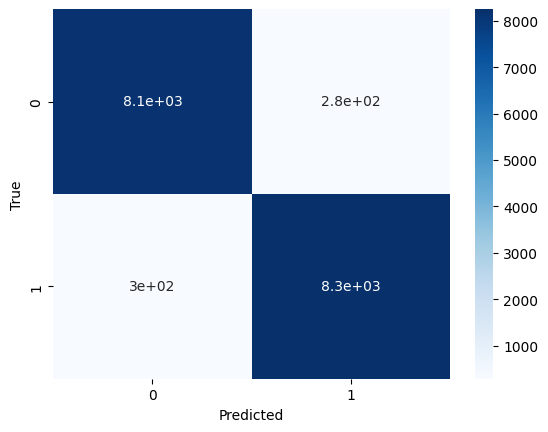

['modelsnew/svmCat2_noisy.pkl']

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the trained model
joblib.dump(svm, 'modelsnew/svmCat2_noisy.pkl')